In [3]:
import pandas as pd
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from efficient_apriori import apriori
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans 
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score 
from clustergram import Clustergram 
import urbangrammar_graphics as ugg 
import seaborn as sns

In [4]:
df = pd.read_pickle(' all_data.pkl ')

In [5]:
df

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
0,0,0,36,среднее,1201,32,5.078678,-0.307147,0.959027,0.5072,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0.0,1,7
1,0,0,36,среднее,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499,0.0,0,37
2,0,0,36,среднее,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799,0.0,0,37
3,4,0,35,среднее,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,0.0,0,0
4,4,0,35,среднее,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем FILA NRK FUN,белый,4999,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786255,15885,1,33,среднее,1190,32,7.321749,0.470877,0.699928,0.4304,Поло мужское Outventure,синий,1599,1.0,0,24
786256,15885,1,33,среднее,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Babolat Complete Muscle,оранжевый/синий,3899,1.0,0,24
786257,15885,1,33,среднее,1190,32,7.321749,0.470877,0.699928,0.4304,Майка мужская Protest Prtihiaka,белый/принт,1679,1.0,1,49
786258,15885,1,33,среднее,1190,32,7.321749,0.470877,0.699928,0.4304,Массажер Demix,темно-зелёный,399,1.0,0,52


In [4]:
df_choise = df.head(50000)

In [6]:
df_choise = df.sample(n= 7500)

In [8]:
df_choise.isnull().sum()

id               0
gender           0
age              0
education        0
city             0
country          0
lbt_coef         0
ac_coef          0
sm_coef          0
personal_coef    0
product          0
colour           0
cost             0
product_sex      0
base_sale        0
dt               0
dtype: int64

In [9]:
df_categorial = df_choise[['education','product','colour']]
df_numeric = df_choise[['id','age','gender','city',
                        'country','product_sex','cost','base_sale','dt']]

In [10]:
sc = StandardScaler()
dfsc = sc.fit_transform(df_numeric)

In [11]:
std_scaler_data = sc.transform(df_numeric)

In [12]:
df_choise[['id','age','gender','city',
                        'country','product_sex','cost','base_sale','dt']] = std_scaler_data

In [13]:
ohe = OneHotEncoder(sparse_output=False)

In [14]:
ohe.fit(df_categorial)

OneHotEncoder(sparse_output=False)

In [15]:
ohe1 = ohe.transform(df_categorial)

In [16]:
df_choise[ohe.get_feature_names_out()] = ohe1

In [17]:
df_choise =df_choise.drop(['education','product','colour'],axis=1)

In [18]:
df_choise = df_choise.drop(['lbt_coef','ac_coef','sm_coef','personal_coef'],axis=1)

In [22]:
tane = TSNE(n_components=2)
dftsne = tane.fit_transform(df_choise)

In [17]:
cluster = AgglomerativeClustering().fit(df_choise)

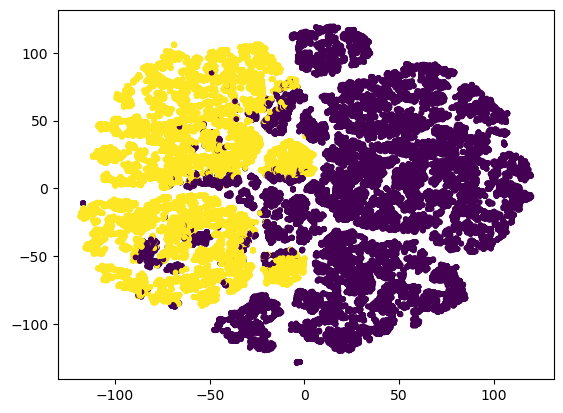

In [18]:
plt.scatter(dftsne[:,0],dftsne[:,1],s=10,c=cluster.labels_)

In [19]:
def plot_dendrogram(model,**kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i,merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count+=1
            else:
                current_count += counts[child_idx - n_samples]
            counts[i] = current_count
        linkage_matrix = np.column_stack([model.children_,model.distances_,counts]).astype(float)
        dendrogram(linkage_matrix,**kwargs)

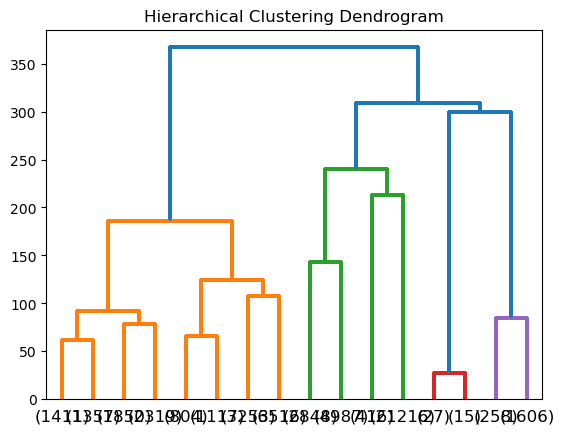

In [21]:
model = AgglomerativeClustering(distance_threshold = 0,n_clusters=None).fit(df_choise)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model,truncate_mode='level',p=3)
plt.show()

In [23]:
inertia = []
N =15
for i in range(2,N):
    kmeans = KMeans(n_clusters = i).fit(df_choise)
    preds= kmeans.predict(df_choise)
    inertia.append(np.sqrt(kmeans.inertia_))

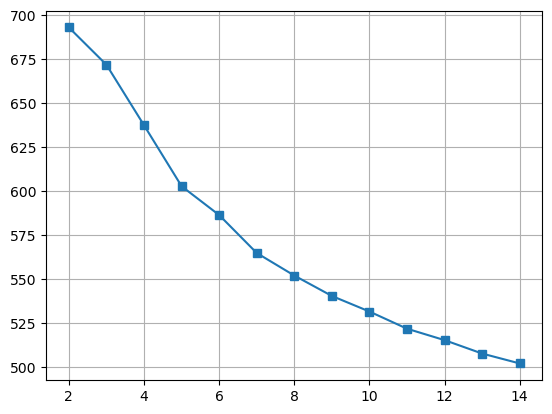

In [24]:
plt.plot(np.arange(2,N),inertia,marker='s')
plt.grid()
plt.show()

K=1 skipped. Mean computed from data directly.
K=2 fitted in 462.836 seconds.
K=3 fitted in 899.992 seconds.
K=4 fitted in 1068.841 seconds.
K=5 fitted in 1180.418 seconds.


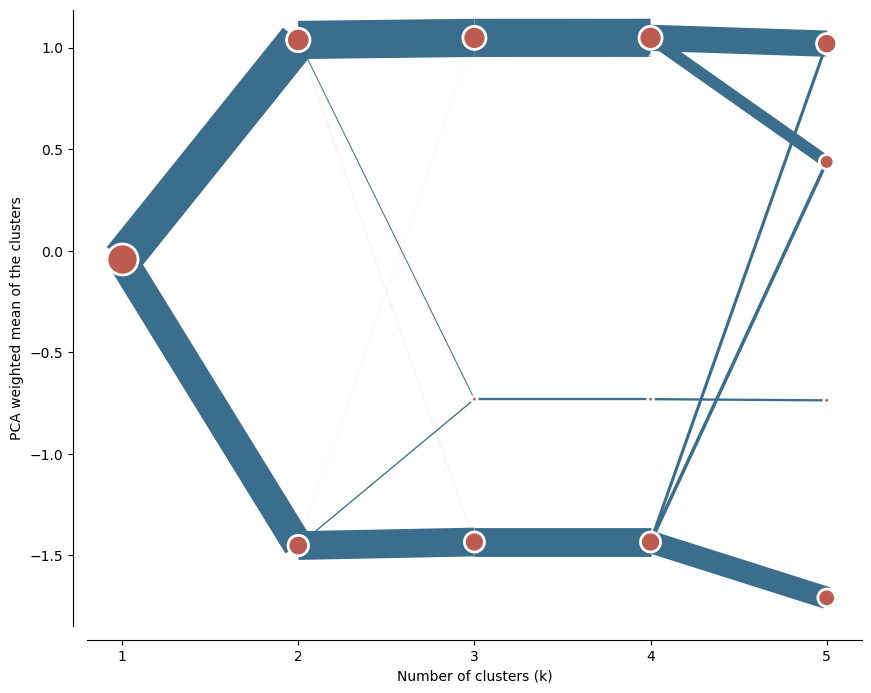

In [19]:
cgram = Clustergram(range(1, 6), n_init=1000, method="kmeans")
cgram.fit(df_choise)
ax = cgram.plot(
figsize= (10, 8), 
    line_style=dict(color=ugg .COLORS[1]), 
    cluster_style={"color": ugg.COLORS [2]} )
ax.yaxis.grid(False)
sns.despine(offset=10)

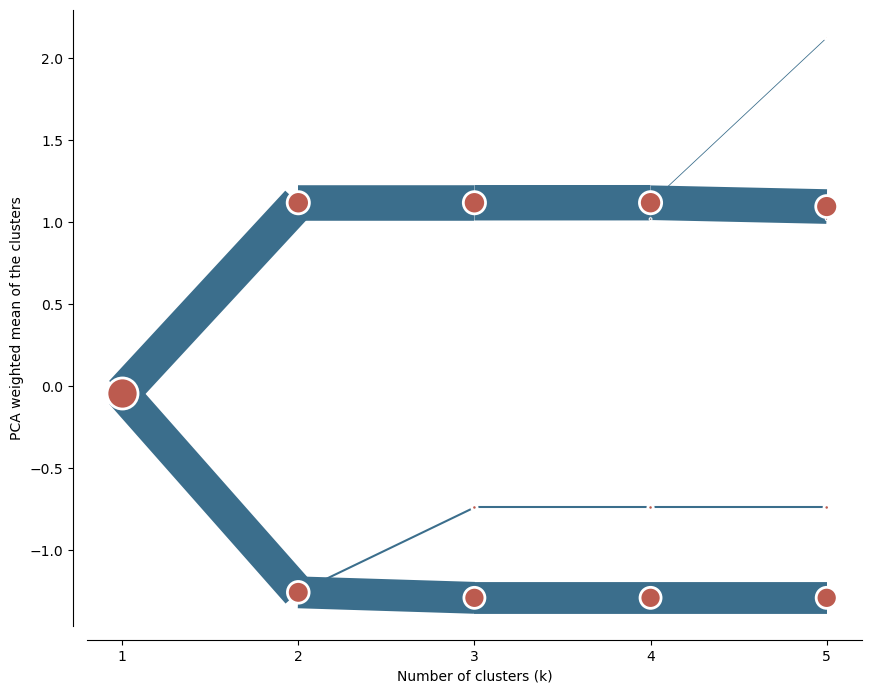

In [20]:
cgram = Clustergram(range(1, 6), method="hierarchical",linkage='ward')
cgram.fit(df_choise)
ax = cgram.plot(
figsize= (10, 8), 
    line_style=dict(color=ugg .COLORS[1]), 
    cluster_style={"color": ugg.COLORS [2]} )
ax.yaxis.grid(False)
sns.despine(offset=10)

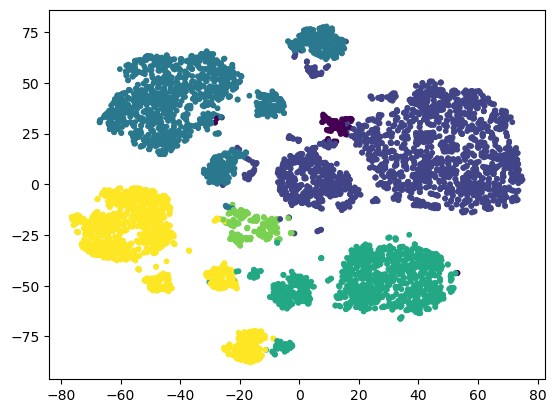

In [23]:
kmeans = KMeans(n_clusters = 6).fit(df_choise)
plt.scatter(dftsne[:,0],dftsne[:,1],s=10,c=kmeans.labels_)

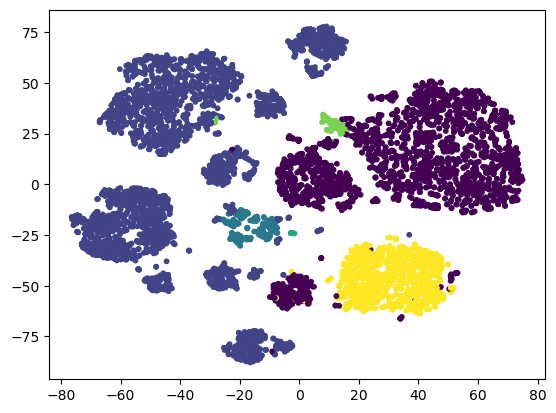

In [24]:
cluster = AgglomerativeClustering(n_clusters = 6).fit(df_choise)
plt.scatter(dftsne[:,0],dftsne[:,1],s=10,c=cluster.labels_)